# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [16]:
import numpy as np
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [17]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]
# Сделайте то же для тестовой выборки

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [18]:
# Напишем фунццию для вычисления а-с-крышечкой. Назовем её, соответственно, Calculate Least Square Method (CalcLSM).

def CalcLSM(X: np.array, y: np.array):
    result = np.linalg.inv(X.T @ X) @ X.T @ y
    return result

# Напечатаем коэффиценты линейной функции k и b: y = kx + b.
temp = np.ones(X_train.shape[0])
Coefs = np.concatenate((X_train.reshape(-1,1), temp.reshape(-1,1)), axis=1)
output = CalcLSM(Coefs, y_train)
print(output)


[2.2791345  4.43323091]


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

Цитируя лаб.работу: "Например, если мы приближаем функцию одной переменной по значениям в 𝑛 точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен (𝑛−1)-й степени, для которого эта ошибка будет равна нулю.", можно сделать вывод, что степень 20 лучше всего приблизит нашу функцию, это работает, потому что точек относительно мало.

Polynomial Coefficients: Power of 20 
 [[-1.74092826e+11]
 [ 1.37572508e+12]
 [-4.92077416e+12]
 [ 1.05143023e+13]
 [-1.49006081e+13]
 [ 1.46747137e+13]
 [-1.01909453e+13]
 [ 4.91404662e+12]
 [-1.53457502e+12]
 [ 2.32489321e+11]
 [ 2.71901165e+10]
 [-2.13047185e+10]
 [ 4.00116492e+09]
 [-1.03081691e+08]
 [-7.55281549e+07]
 [ 1.06737034e+07]
 [-1.67572297e+05]
 [-5.87045010e+04]
 [ 3.24547947e+03]
 [-6.89810635e-01]
 [ 3.22961248e+00]]


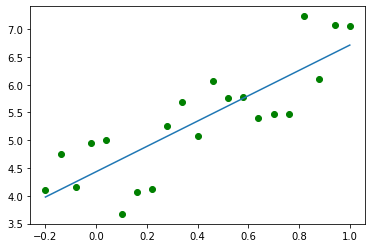

In [19]:
# Начертим график этой функции
from scipy import linalg
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'go')
func = output[0] * X_train + output[1]
plt.plot(X_train, func, label="linear regression")
X_train

def get_X(data, i):
    x = np.ones((len(data), 1))
    X = np.ones((len(data), 1))
    for j in range(i):
        x *= np.array([data]).T
        X = np.concatenate((x, X), axis=1)
    return X

X_new = get_X(X_train, len(X_train) - 1)
y = (np.array([y_train])).T
a_new = linalg.solve(X_new, y)
print("Polynomial Coefficients: Power of", len(X_train) - 1,'\n', a_new)

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

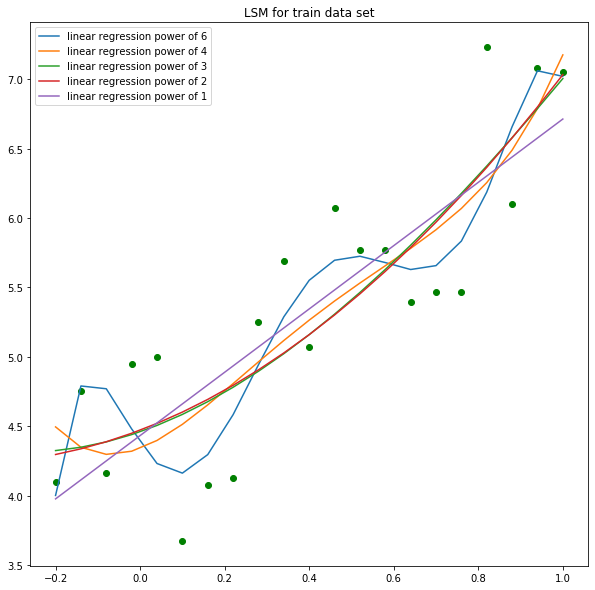

Train Dataset: Power of 10: MSE = 0.15316611003132005
Train Dataset: Power of 9: MSE = 0.15847184274751067
Train Dataset: Power of 8: MSE = 0.15905556579088612
Train Dataset: Power of 7: MSE = 0.185396211532947
Train Dataset: Power of 6: MSE = 0.18829348988370437
Train Dataset: Power of 5: MSE = 0.24998504648317554
Train Dataset: Power of 4: MSE = 0.2610665330579276
Train Dataset: Power of 3: MSE = 0.269497187147961
Train Dataset: Power of 2: MSE = 0.26969891587669137
Train Dataset: Power of 1: MSE = 0.29689663326251964


In [20]:
# Напишем функцию для формирования матрицы, в которой значения элементов каждого столбца -
# соответствующие элементы матрицы Х в степени i от 0 до k.

def formM (X, k):
    k+=1
    M = np.power(np.repeat(X.reshape((-1, 1)), k, axis=1), np.arange(k))
    return M

# Реализуем функцию для вычисления Среднеквадратической Ошибки (MSE Mean Square Error).

def MSE(func, Y):
    return ((Y - func) ** 2).mean()

# Для удобства заведём массив, хранящий по i-ому индексу элементы столбца в i-ой степени.
# Поэтому размер массива на единицу больше, чем должен быть. Но так как нам требуются матрицы
# до 10 степени, достаточно и 11 элементов массива Matrices
# Аналогично заполним массив alphas коэффициентами, соответствующими i-ой матрице.

Matrices = [0] * 11
alphas = [0] * 11
for h in range (1, 11):
    Matrices[h] = formM(X_train, h)
    alphas[h] = CalcLSM(Matrices[h], y_train)

# Строим Графики

plt.figure(figsize=(10, 10))
plt.plot(X_train, y_train, 'go')
plt.plot(X_train, Matrices[6].dot(alphas[6]), label="linear regression power of 6")
plt.plot(X_train, Matrices[4].dot(alphas[4]), label="linear regression power of 4")
plt.plot(X_train, Matrices[3].dot(alphas[3]), label="linear regression power of 3")
plt.plot(X_train, Matrices[2].dot(alphas[2]), label="linear regression power of 2")
plt.plot(X_train, Matrices[1].dot(alphas[1]), label="linear regression power of 1")
plt.title("LSM for train data set")
plt.legend()
plt.show()

# Выводим значения Среднеквадратической Ошибки для каждой степени многочлена

print("Train Dataset: Power of 10: MSE =", MSE(Matrices[10]@alphas[10], y_train))
print("Train Dataset: Power of 9: MSE =", MSE(Matrices[9]@alphas[9], y_train))
print("Train Dataset: Power of 8: MSE =", MSE(Matrices[8]@alphas[8], y_train))
print("Train Dataset: Power of 7: MSE =", MSE(Matrices[7]@alphas[7], y_train))
print("Train Dataset: Power of 6: MSE =", MSE(Matrices[6]@alphas[6], y_train))
print("Train Dataset: Power of 5: MSE =", MSE(Matrices[5]@alphas[5], y_train))
print("Train Dataset: Power of 4: MSE =", MSE(Matrices[4]@alphas[4], y_train))
print("Train Dataset: Power of 3: MSE =", MSE(Matrices[3]@alphas[3], y_train))
print("Train Dataset: Power of 2: MSE =", MSE(Matrices[2]@alphas[2], y_train))
print("Train Dataset: Power of 1: MSE =", MSE(Matrices[1]@alphas[1], y_train))


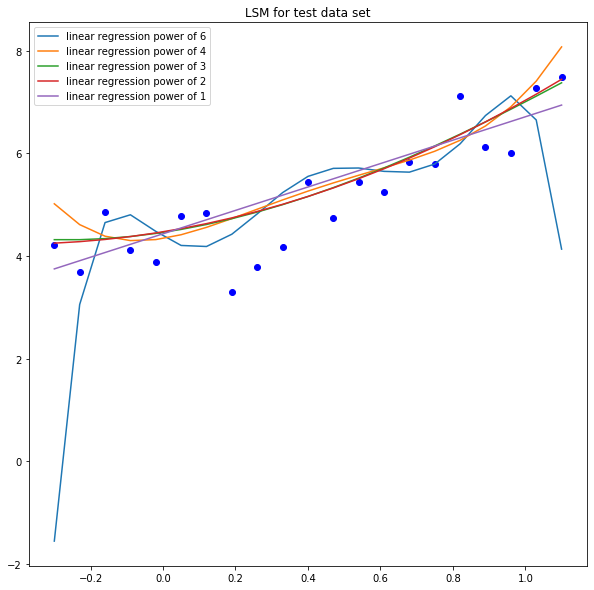

#=====================Printing Mean Squared Error for each graph=======================
Test Dataset: Power of 10: MSE = 14.63241216303443
Test Dataset: Power of 9: MSE = 4.776341940080861
Test Dataset: Power of 8: MSE = 4.357288863017562
Test Dataset: Power of 7: MSE = 2.5157829074244944
Test Dataset: Power of 6: MSE = 2.581692932522644
Test Dataset: Power of 5: MSE = 0.5579732021788705
Test Dataset: Power of 4: MSE = 0.4417270189285444
Test Dataset: Power of 3: MSE = 0.3553464571518395
Test Dataset: Power of 2: MSE = 0.35647628878312543
Test Dataset: Power of 1: MSE = 0.4351202004048878


In [21]:
#======================Lists of needed matrices and polynomials========================

test_Matrices = [0] * (11)
test_alphas = [0] * (11)
for h in range (1, 11):
    test_Matrices[h] = formM(X_test, h)
    
#=================================Plotting the graph===================================

plt.figure(figsize=(10, 10))
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, test_Matrices[6]@alphas[6], label="linear regression power of 6")
plt.plot(X_test, test_Matrices[4]@alphas[4], label="linear regression power of 4")
plt.plot(X_test, test_Matrices[3]@alphas[3], label="linear regression power of 3")
plt.plot(X_test, test_Matrices[2]@alphas[2], label="linear regression power of 2")
plt.plot(X_test, test_Matrices[1]@alphas[1], label="linear regression power of 1")
plt.title("LSM for test data set")
plt.legend()
plt.show()

print("#=====================Printing Mean Squared Error for each graph=======================")

print("Test Dataset: Power of 10: MSE =", MSE(test_Matrices[10]@alphas[10], y_test))
print("Test Dataset: Power of 9: MSE =", MSE(test_Matrices[9]@alphas[9], y_test))
print("Test Dataset: Power of 8: MSE =", MSE(test_Matrices[8]@alphas[8], y_test))
print("Test Dataset: Power of 7: MSE =", MSE(test_Matrices[7]@alphas[7], y_test))
print("Test Dataset: Power of 6: MSE =", MSE(test_Matrices[6]@alphas[6], y_test))
print("Test Dataset: Power of 5: MSE =", MSE(test_Matrices[5]@alphas[5], y_test))
print("Test Dataset: Power of 4: MSE =", MSE(test_Matrices[4]@alphas[4], y_test))
print("Test Dataset: Power of 3: MSE =", MSE(test_Matrices[3]@alphas[3], y_test))
print("Test Dataset: Power of 2: MSE =", MSE(test_Matrices[2]@alphas[2], y_test))
print("Test Dataset: Power of 1: MSE =", MSE(test_Matrices[1]@alphas[1], y_test))

### Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Как было объяснено выше, такой эффект называется "переобучением". То есть неточность нашей обученной функции - результат неточных (с большой погрешность) измерений.

In [22]:
print("Test Dataset: Power of 10: MSE =", MSE(test_Matrices[10]@alphas[10], y_test))
print("Train Dataset: Power of 10: MSE =", MSE(Matrices[10]@alphas[10], y_train))

Test Dataset: Power of 10: MSE = 14.63241216303443
Train Dataset: Power of 10: MSE = 0.15316611003132005


### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [23]:
import pandas as pd

#=========================DATA=============================

flat_info = pd.read_csv('flats_moscow_mod.txt', delimiter='\t')
x_values = np.array(flat_info.drop('price', axis=1))
y_values = np.array(flat_info['price'])
alpha_coefs = CalcLSM(x_values, y_values)
func = x_values.dot(alpha_coefs)

#==========================OUTPUT==========================

print("Mean Square Error :", MSE(func, y_values))
print("<< Регрессионные Коэффициенты >>")
print("Price", alpha_coefs[0])
print("Total Space", alpha_coefs[1])
print("Living Space", alpha_coefs[2])
print("Kitchen Space", alpha_coefs[3])
print("Distance", alpha_coefs[4])


Mean Square Error : 935.7887456487842
<< Регрессионные Коэффициенты >>
Price 1.554784070005632
Total Space 1.1740233040193317
Living Space 1.758058196784951
Kitchen Space -3.9168121964687064
Distance -1.551382456399667


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#========================PARSING===========================
price = np.array(flat_info['price']).reshape(-1, 1)
totalSpace = np.array(flat_info['totsp']).reshape(-1, 1)
livingSpace = np.array(flat_info['livesp']).reshape(-1, 1)
kitchenSpace = np.array(flat_info['kitsp']).reshape(-1, 1)
distance = np.array(flat_info['dist']).reshape(-1, 1)

#==== <Adding new columns to the Matrix> ====
idMatrix = np.ones(x_values.shape[0])
idMatrix = idMatrix.reshape(-1,1)
polynomials_new = np.concatenate((idMatrix, np.concatenate((x_values,np.log(kitchenSpace)), axis = 1)), axis = 1)
polynomials_new = np.concatenate((polynomials_new, np.power(livingSpace, 2)), axis = 1)
polynomials_new = np.concatenate((polynomials_new, np.power(distance, 3)), axis = 1)

#==== <Formed> ====
X_tr, X_ts, y_tr, y_ts = sklearn.model_selection.train_test_split(polynomials_new, y_values, test_size=0.25)
new_coefs4train = CalcLSM(X_tr, y_tr)
new_func4train = X_tr.dot(new_coefs4train)

new_coefs4test = CalcLSM(X_ts, y_ts)
new_func4test = X_ts.dot(new_coefs4test)

print("For Train Data:", MSE(new_func4train, y_tr))
print("For Test Data:", MSE(new_func4test, y_ts))
print("Разница лоссов двух сетов данных:", MSE(new_func4train, y_tr) - MSE(new_func4test, y_ts))

For Train Data: 825.0246649640724
For Test Data: 637.3338926857117
Разница лоссов двух сетов данных: 187.69077227836067


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [26]:
# Заведем две группы переменных и функций ("до" и "после" регуляризации).

#===================================Before=(bef_)=====================================

def bef_CalcLSM(X: np.array, y: np.array):
    result = np.linalg.inv(X.T @ X) @ X.T @ y
    return result

tmp_Matrices = [0] * 11
tmp_alphas = [0] * 11
for h in range (1, 11):
    tmp_Matrices[h] = formM(X_train, h)
    tmp_alphas[h] = bef_CalcLSM(tmp_Matrices[h], y_train)
    
#Все аналогично первому заданию.
#Далее считаем определитель для многочлена 3-eй степени
    
bef_det = np.linalg.det(tmp_Matrices[3].T @ tmp_Matrices[3])

#===================================After=(aft_)======================================

def aft_CalcLSM(X: np.array, y: np.array):
    _lambda = 1.158
    E = np.identity((X.T @ X).shape[0])
    result = np.linalg.inv((X.T @ X) + _lambda*E) @ X.T @ y
    return result

aft_tmp_Matrices = [0] * 11
aft_tmp_alphas = [0] * 11
for h in range (1, 11):
    aft_tmp_Matrices[h] = formM(X_train, h)
    aft_tmp_alphas[h] = aft_CalcLSM(aft_tmp_Matrices[h], y_train)

# Аналогично первому заданию ^^^^^^^^^^^^^^^^^^^^
# Далее вводим новые переменные для удобства вычислений - лямбду, значение которой мы
# будем подбирать аналогом "бинарного поиска", взяв значения 1 и 5 как ограничители.
# Перебирал значения руками. Когда дошел до 1.125 мне подсказали ответ и я дописал.

_lambda = 1.158
E = np.identity((aft_tmp_Matrices[3].T @ aft_tmp_Matrices[3]).shape[0])
aft_det = np.linalg.det(((aft_tmp_Matrices[3].T @ aft_tmp_Matrices[3]) + _lambda*E))

#========Train Data Matrix and Polynomical for 3th power=========

bef_ThreeAlpha = tmp_alphas[3]
aft_ThreeAlpha = aft_tmp_alphas[3]

#==========Test Matrix for 3th power=========

ThreeMatrix = formM(X_test, 3)

#======================Lists of needed matrices and polynomials=======================

test_Matrices = [0] * 11
test_alphas = [0] * 11
for h in range (1, 11):
    test_Matrices[h] = formM(X_test, h)

print("Test Dataset: Power of 3: MSE =", MSE(ThreeMatrix@bef_ThreeAlpha, y_test))
print("Test Dataset: Power of 3: MSE =", MSE(ThreeMatrix@aft_ThreeAlpha, y_test))
print("Lambda = 1.158")
print("det(𝑋^𝑇 𝑋) = ", bef_det)
print("det(𝑋^𝑇 𝑋 + 𝜆𝐸) = ", aft_det)
print("Модуль разницы определителей: ", aft_det - bef_det, ", который приблизительно равен второму определителю, так как первый  очень маленький")

Test Dataset: Power of 3: MSE = 0.3553464571518395
Test Dataset: Power of 3: MSE = 0.29047781567822945
Lambda = 1.158
det(𝑋^𝑇 𝑋) =  0.49190932025768047
det(𝑋^𝑇 𝑋 + 𝜆𝐸) =  303.21615105776783
Модуль разницы определителей:  302.72424173751017 , который приблизительно равен второму определителю, так как первый  очень маленький


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

Очевидно, модель с регуляризацией представляет собой "гладкую" кривую без резких изгибов, которая невооруженным глазом наиболее точно приближает значение нашей функции к значению первоначальной/истинной.

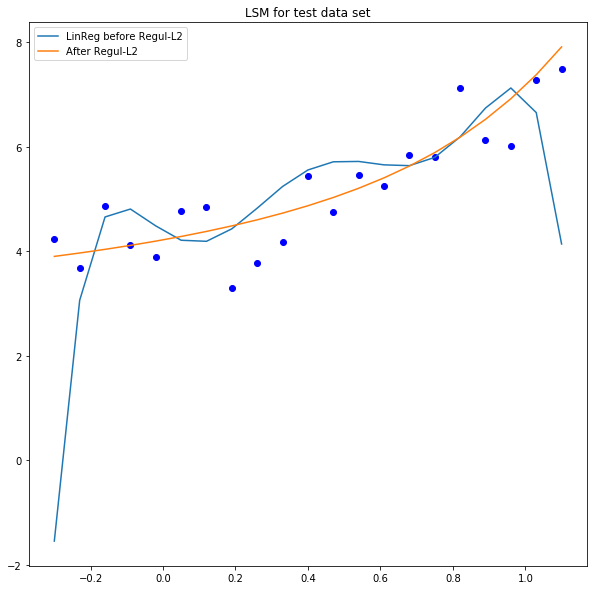

In [82]:
plt.figure(figsize=(10, 10))
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, test_Matrices[6]@bef_SixAlpha, label="LinReg before Regul-L2")
plt.plot(X_test, test_Matrices[6]@aft_SixAlpha, label="After Regul-L2")
plt.title("LSM for test data set")
plt.legend()
plt.show()

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Если $a$ является матрицей столбцов, сумма квадратов ее элементов является просто произведением $a^Ta$. Поэтому теперь нам нужно минимизировать $(Xa − y)^T (Xa − y)$. Эта величина известна как функция потерь $a$.

$$(Xa - y)^T(Xa - y) + \lambda a^Ta\rightarrow\min $$
Чтобы разницу минимизировать, мы дифференцируем обе стороны выражения, т.о. выражение приравнивается к 0.
Далее, дифференцируем сумму по $а$. Нам нужно теперь взять производную произведения $(Xa - y)^T(Xa - y)$ и производную выражения $\lambda a^Ta$, которое равно вектору элементов, равных элементам $a^2$, поэтому равно $2\lambda a$.
$$ X^T(Xa - y) + (Xa - y)^TX + 2\lambda a = 0 $$
$$ X^TXa - X^Ty + X^TXa - X^Ty + 2\lambda a = 0 $$
$$ 2X^TXa - 2X^Ty + 2\lambda a = 0 $$
$$ (X^TX - \lambda E)2a = 2X^Ty $$
$$ a = (X^TX + \lambda E)^{-1}X^Ty $$

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

#### Алгоритм основывается на изменении наших матриц, полученных при использовании Метода Наименьщих Квадратов. Получая новые точки, мы меняем матрицы, отталкиваясь от значений новых $х$ и $у$, тем самым мы заново обучаем нашу функцию, делая коэффициенты более точными. Затем мы считаем наши коэффициенты, решив СЛУ относительно массива их значений. Затем просто построим нашу функцию, зная коэффициенты при каждом члене.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

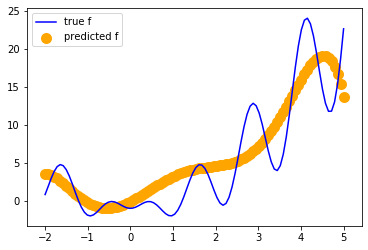

In [80]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

# Здесь мы можем менять степень, которая нужна, но на единицу больше, так как нумерация идет с нуля и второй
# аргумент не включительный, то есть идет до i-ой степени, но не включает её.

x_grid_enl = formM(x_grid, 6)
#--------------------------^можем менять от 0 до 6.
# Заведем две переменные А и В для удобства хранения значений произведений x_grid_enl.T @ x_grid_enl
# и x_grid_enl.T @ y_grid, необходимые для решения СЛУ

A = x_grid_enl.T @ x_grid_enl
B = x_grid_enl.T @ y_grid

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    # Здесь нам достаточно при получении новых элементов добавить ко всем элементам матриц А и В, соответственно
    # (x_new)**2 и (x_new * y_new). Так как:
    # Для А: это тоже самое что заново перемножить новую транспонированную матрицу (x_grid_len.Т) на себя, то есть
    # получить квадраты элементов.
    # Для В: аналогично, можем перемножить столбцы и матрицы x_grid_enl.T и y_grid и получим то же самое.
    
    A = A + (x_new)**2
    B = B + (x_new * y_new)

    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        # Найдем теперь коэффициенты при каждой степени аргумента, решив СЛУ Ax=B, но в данном случае х - y_pred.
        poly_coefs = np.linalg.inv(A).dot(B)
        y_pred = x_grid_enl.dot(poly_coefs)
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        plt.legend(loc='upper left')
        plt.show()

##### Теперь, зная поведение нашей функции при разных значениях старшей степени, мы можем заметить, что при 5-ой степени функция наиболее точно приближается к первоначальной истинной.

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.